In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 1.This part is for Lok Sabha Visualization

In [116]:
data = pd.read_csv(r'indian-national-level-election.csv')

In [117]:
data.head(5)

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


In [118]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73081 entries, 0 to 73080
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   st_name     73081 non-null  object
 1   year        73081 non-null  int64 
 2   pc_no       73081 non-null  int64 
 3   pc_name     73081 non-null  object
 4   pc_type     65011 non-null  object
 5   cand_name   73081 non-null  object
 6   cand_sex    72539 non-null  object
 7   partyname   73081 non-null  object
 8   partyabbre  73081 non-null  object
 9   totvotpoll  73081 non-null  int64 
 10  electors    73081 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 6.1+ MB


In [119]:
data.isnull().sum()

st_name          0
year             0
pc_no            0
pc_name          0
pc_type       8070
cand_name        0
cand_sex       542
partyname        0
partyabbre       0
totvotpoll       0
electors         0
dtype: int64

In [120]:
data.pc_type.value_counts()

GEN    54862
SC      7293
ST      2841
SC        15
Name: pc_type, dtype: int64

In [121]:
data['pc_type']=data['pc_type'].fillna('GEN')

In [122]:
data['pc_type'].isnull().sum()

0

In [123]:
data[data['st_name']=='Rajasthan']['cand_sex'].value_counts()

M    3242
F     166
Name: cand_sex, dtype: int64

In [124]:
data['cand_sex']=data['cand_sex'].fillna('M')

In [125]:
data.cand_sex.isnull().sum()

0

In [126]:
data.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


In [127]:
data.partyname.value_counts()

Independent                   31458
IND                            5619
Independents                   4050
Indian National Congress       3919
Bharatiya Janata Party         2329
                              ...  
Bahujan Ekta Party (R)            1
National Congress Of Youth        1
MJM                               1
KSVP                              1
Orissa Congress                   1
Name: partyname, Length: 1424, dtype: int64

In [128]:
data.replace(to_replace=["Independents"],value="Independent")

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independent,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independent,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independent,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independent,IND,405,96084
...,...,...,...,...,...,...,...,...,...,...,...
73076,West Bengal,2014,42,Birbhum,GEN,None Of The Above,M,NOTA,NOTA,14557,1495089
73077,West Bengal,2014,42,Birbhum,GEN,Syed Siraj Jimmi,M,INC,INC,132084,1495089
73078,West Bengal,2014,42,Birbhum,GEN,Joy Banerjee,M,BJP,BJP,235753,1495089
73079,West Bengal,2014,42,Birbhum,GEN,Dr. Elahi Kamre Mahammad,M,CPM,CPM,393305,1495089


In [129]:
data[data['st_name']=='West Bengal']['pc_type'].value_counts()

GEN    3048
SC      481
ST      119
Name: pc_type, dtype: int64

In [130]:
def seat_distribute(s1,s2,s3,s4,s5):
    v1=data[data['st_name']==s1]['pc_type'].value_counts()
    v2=data[data['st_name']==s2]['pc_type'].value_counts()
    v3=data[data['st_name']==s3]['pc_type'].value_counts()
    v4=data[data['st_name']==s4]['pc_type'].value_counts()
    v5=data[data['st_name']==s5]['pc_type'].value_counts()
    df=pd.DataFrame([v1,v2,v3,v4,v5])
    df.index=[s1,s2,s3,s4,s5]
    df.plot(kind='bar',stacked=True,figsize=(10,5))

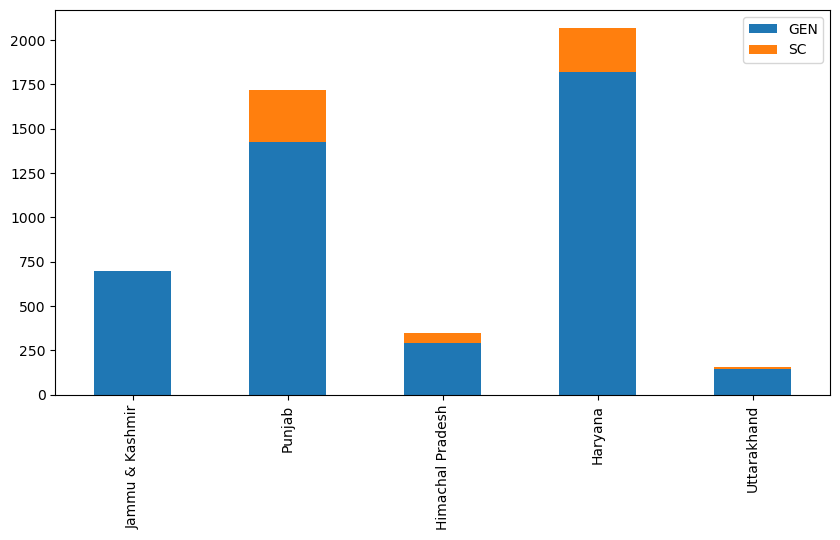

In [131]:
seat_distribute('Jammu & Kashmir','Punjab','Himachal Pradesh','Haryana','Uttarakhand')

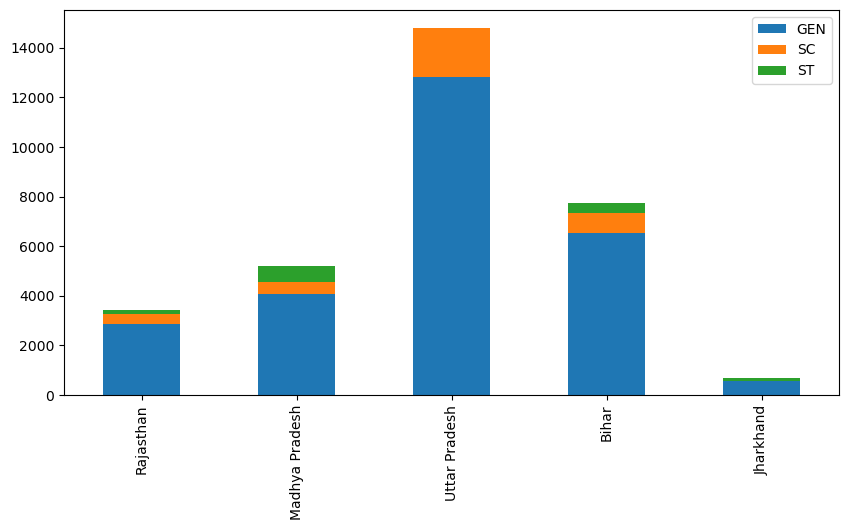

In [132]:
seat_distribute('Rajasthan','Madhya Pradesh','Uttar Pradesh','Bihar','Jharkhand')

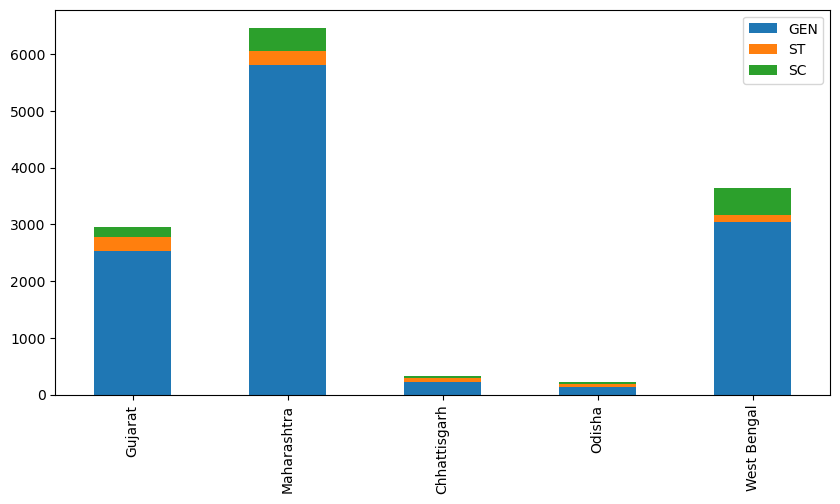

In [133]:
seat_distribute('Gujarat','Maharashtra','Chhattisgarh','Odisha','West Bengal')

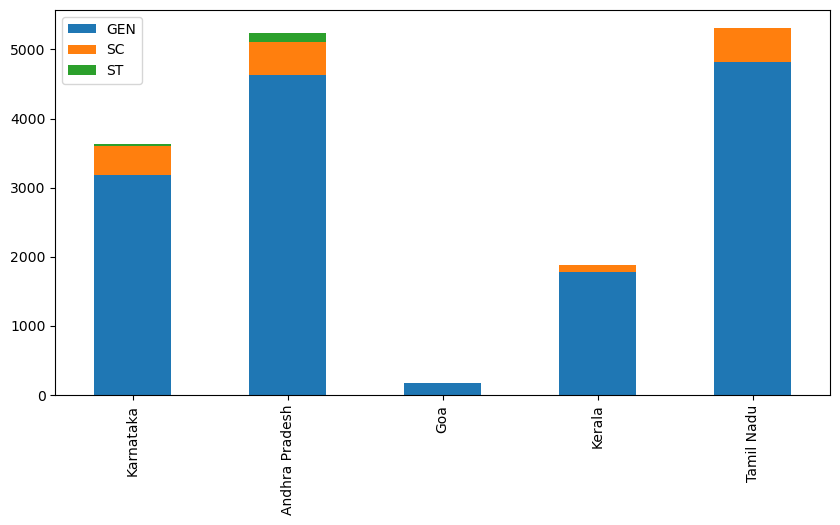

In [134]:
seat_distribute('Karnataka','Andhra Pradesh','Goa','Kerala','Tamil Nadu')

In [135]:
data.st_name.unique()

array(['Andaman & Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Chandigarh', 'Chattisgarh', 'Chhattisgarh',
       'Dadra & Nagar Haveli', 'Daman & Diu', 'Delhi', 'Goa',
       'Goa Daman & Diu', 'Goa, Daman & Diu', 'Gujarat', 'Haryana',
       'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka',
       'Kerala', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra',
       'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'National Capital Territory Of Delhi', 'Nct Of Delhi', 'Odisha',
       'Orissa', 'Pondicherry', 'Puducherry', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Tripura', 'Uttar Pradesh', 'Uttarakhand',
       'Uttaranchal', 'West Bengal'], dtype=object)

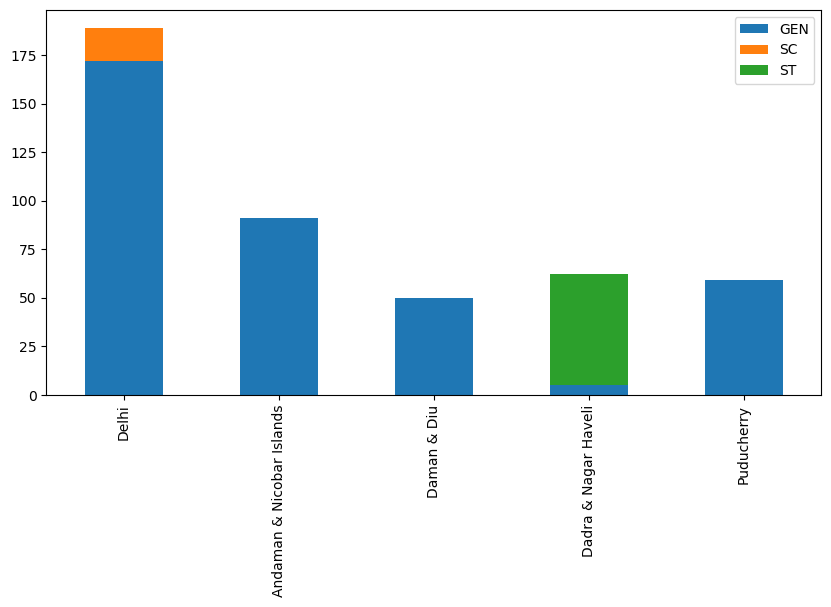

In [136]:
seat_distribute('Delhi','Andaman & Nicobar Islands','Daman & Diu','Dadra & Nagar Haveli','Puducherry')

In [137]:
data.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


In [138]:
data.year.unique()

array([1977, 1980, 1984, 1989, 1991, 1996, 1998, 1999, 2004, 2009, 2014],
      dtype=int64)

In [139]:
data[data['st_name']=='Andaman & Nicobar Islands']['year'].sum()

181846

In [140]:
data.groupby('year')['totvotpoll'].sum()

year
1977    188917504
1980    197824274
1984    249583543
1989    300713862
1991    278218849
1996    334327592
1998    367952396
1999    363694693
2004    389779784
2009    417158672
2014    553802946
Name: totvotpoll, dtype: int64

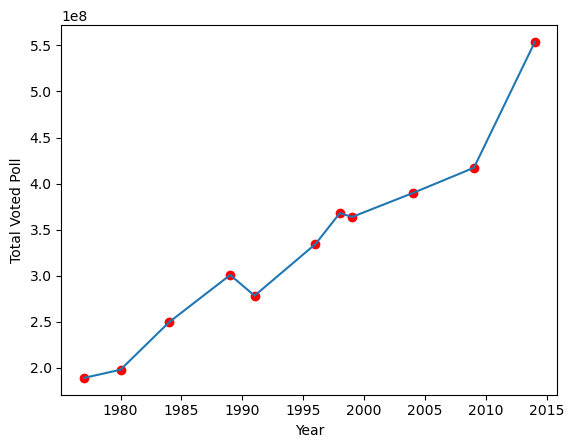

In [141]:
x=data.year.unique()
y=data.groupby('year')['totvotpoll'].sum()
plt.scatter(x,y,color='red')
plt.plot(x,y)
plt.xlabel("Year")
plt.ylabel("Total Voted Poll")
plt.show()

In [142]:
data[data['st_name']=='Punjab'].groupby('year')['totvotpoll'].sum()

year
1977     5611311
1980     5974038
1984     6932890
1989     7942827
1991     3016397
1996     8827945
1998     9115939
1999     8754525
2004    10229072
2009    11829304
2014    13845132
Name: totvotpoll, dtype: int64

In [143]:
def State_total_votes(state):
    x=data.year.unique()
    y=data[data['st_name']==state].groupby('year')['totvotpoll'].sum()
    plt.scatter(x,y,color='red')
    plt.plot(x,y)
    plt.title(state)
    plt.xlabel("Year")
    plt.ylabel("Total Voted Poll")
    plt.show()

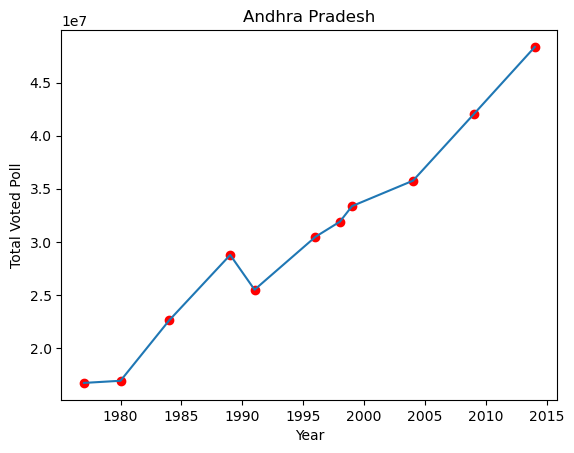

In [144]:
State_total_votes('Andhra Pradesh')

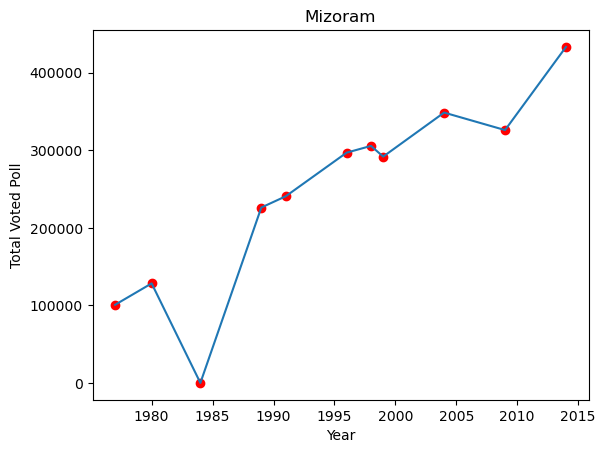

In [145]:
State_total_votes('Mizoram')

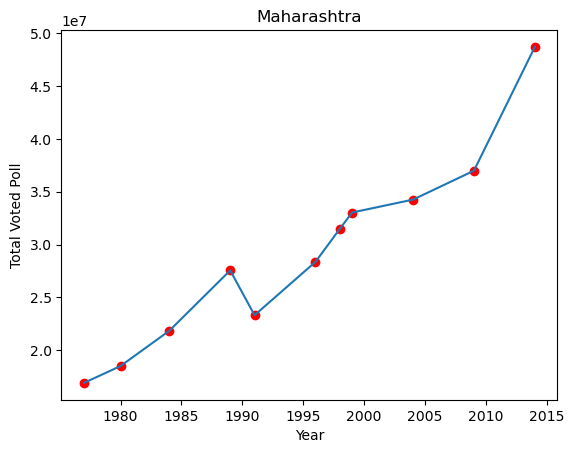

In [146]:
State_total_votes('Maharashtra')

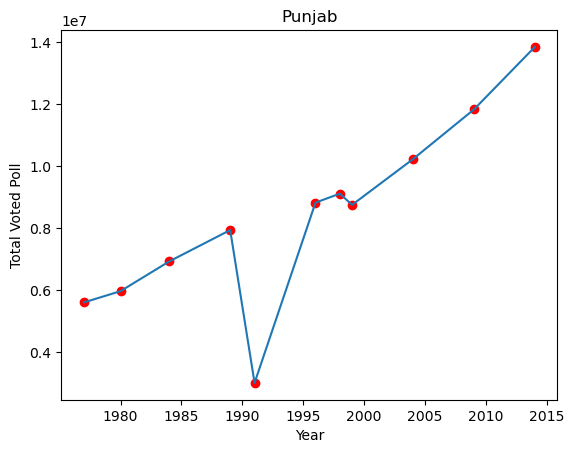

In [147]:
State_total_votes('Punjab')

In [148]:
data.groupby('year')['electors'].sum()

year
1977     1465366626
1980     3140863272
1984     4097852589
1989     5963807267
1991     8570511906
1996    16223710033
1998     5462209605
1999     5423524434
2004     6947799204
2009    10900721088
2014    13820775301
Name: electors, dtype: int64

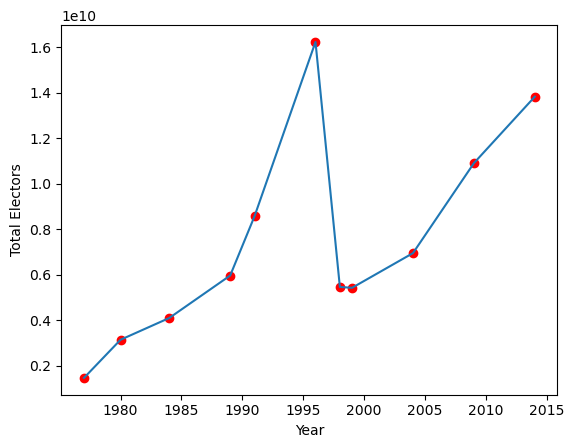

In [149]:
x=data.year.unique()
y=data.groupby('year')['electors'].sum()
plt.scatter(x,y,color='red')
plt.plot(x,y)
plt.xlabel("Year")
plt.ylabel("Total Electors")
plt.show()

In [150]:
def State_total_elect(state):
    x=data.year.unique()
    y=data[data['st_name']==state].groupby('year')['electors'].sum()
    plt.scatter(x,y,color='red')
    plt.plot(x,y)
    plt.title(state)
    plt.xlabel("Year")
    plt.ylabel("Total Electors")
    plt.show()

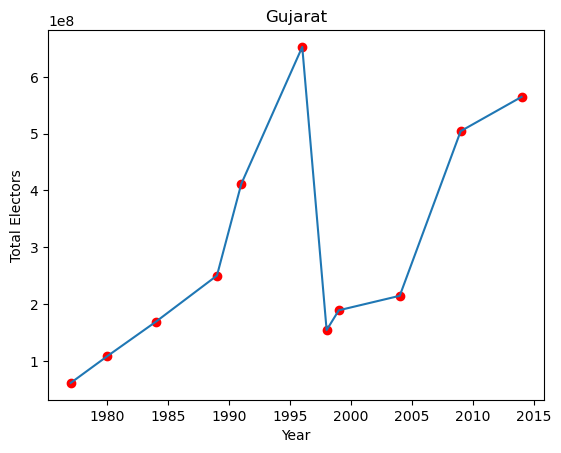

In [151]:
State_total_elect('Gujarat')

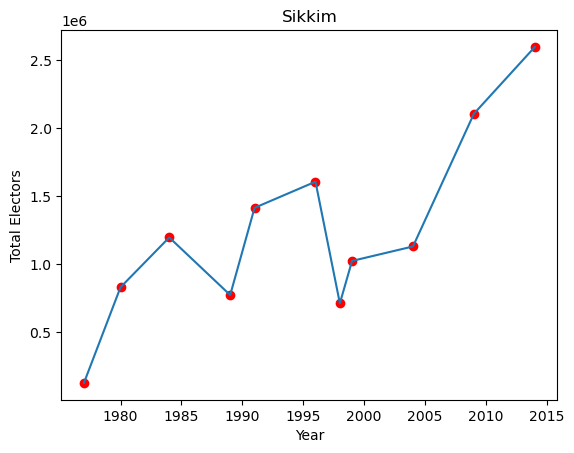

In [152]:
State_total_elect('Sikkim')

In [153]:
data.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


In [154]:
import numpy as np

In [155]:
data.year.sort_values().value_counts()

1996    13940
2014     8794
1991     8744
2009     8070
1989     6156
1984     5492
2004     5435
1998     4740
1999     4642
1980     4629
1977     2439
Name: year, dtype: int64

In [156]:
data[data['cand_sex']=='F']['year'].value_counts().sort_values()

1977     70
1980    143
1984    171
1989    198
1998    274
1999    284
1991    330
2004    355
2009    556
1996    599
2014    668
Name: year, dtype: int64

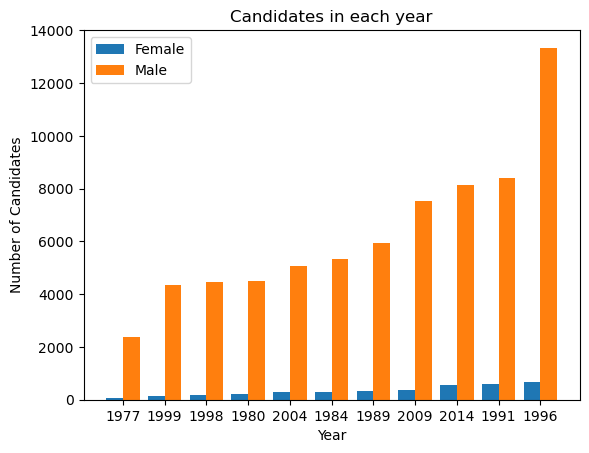

In [157]:
x=['1977','1999','1998','1980','2004','1984','1989','2009','2014','1991','1996']
y=data[data['cand_sex']=='F']['year'].value_counts().sort_values()
z=data[data['cand_sex']=='M']['year'].value_counts().sort_values()

x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, y, 0.4, label = 'Female') 
plt.bar(x_axis + 0.2, z, 0.4, label = 'Male') 

plt.xticks(x_axis, x) 
plt.xlabel("Year") 
plt.ylabel("Number of Candidates") 
plt.title("Candidates in each year") 
plt.legend() 
plt.show() 

In [158]:
data.head()

,st_name,year,pc_no,pc_name,pc_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,K.R. Ganesh,M,Independents,IND,25168,85308
1,Andaman & Nicobar Islands,1977,1,Andaman & Nicobar Islands,GEN,Manoranjan Bhakta,M,Indian National Congress,INC,35400,85308
2,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Ramesh Mazumdar,M,Independents,IND,109,96084
3,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Alagiri Swamy,M,Independents,IND,125,96084
4,Andaman & Nicobar Islands,1980,1,Andaman & Nicobar Islands,GEN,Kannu Chemy,M,Independents,IND,405,96084


In [159]:
data.partyabbre.value_counts()

IND     41127
INC      4800
BJP      3350
BSP      2624
SP       1057
        ...  
RIS         1
SJP         1
SCR         1
SPC         1
RSGP        1
Name: partyabbre, Length: 1071, dtype: int64

In [160]:
data[data['st_name']=='Punjab']['partyabbre'].value_counts().head()

IND       948
INC       121
SAD        87
BSP        75
SAD(M)     41
Name: partyabbre, dtype: int64

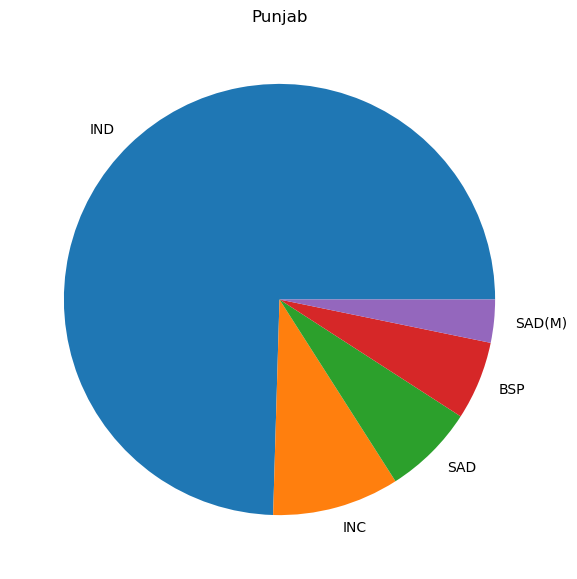

In [161]:
party=data[data['st_name']=='Punjab']['partyabbre'].value_counts().head().keys()
Data=data[data['st_name']=='Punjab']['partyabbre'].value_counts().head()
fig = plt.figure(figsize=(10, 7))
plt.pie(Data, labels=party)
plt.title('Punjab')
plt.show()

In [162]:
def total_candidate(state):
    party=data[data['st_name']==state]['partyabbre'].value_counts().head().keys()
    Data=data[data['st_name']==state]['partyabbre'].value_counts().head()
    fig = plt.figure(figsize=(10, 7))
    plt.pie(Data, labels=party)
    plt.title(state)
    plt.show()

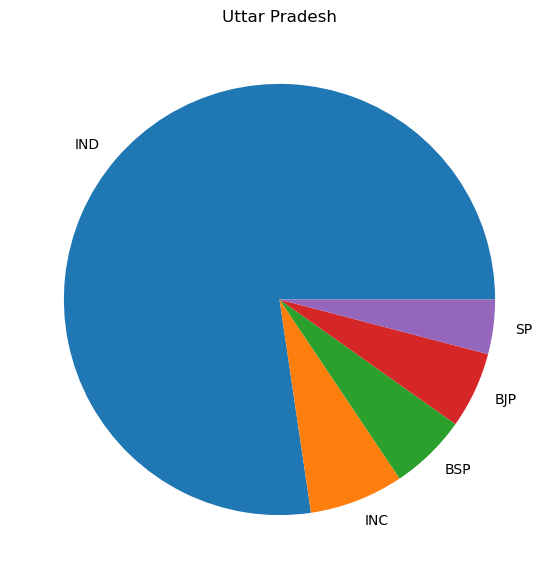

In [163]:
total_candidate('Uttar Pradesh')

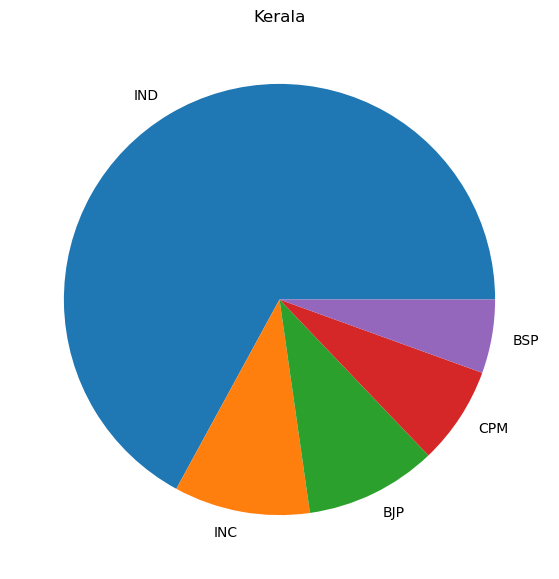

In [164]:
total_candidate('Kerala')

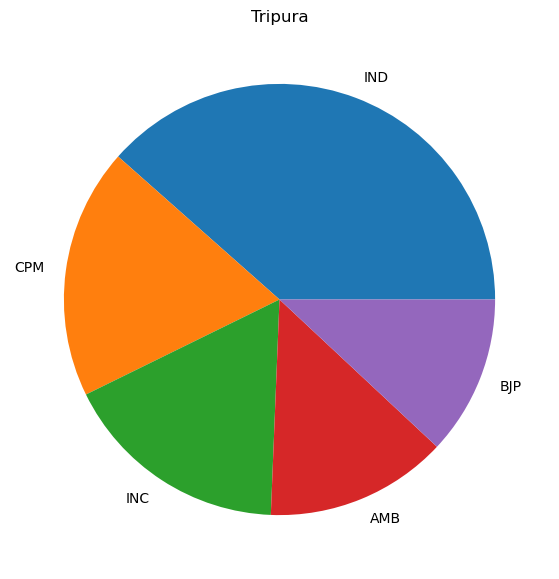

In [165]:
total_candidate('Tripura')

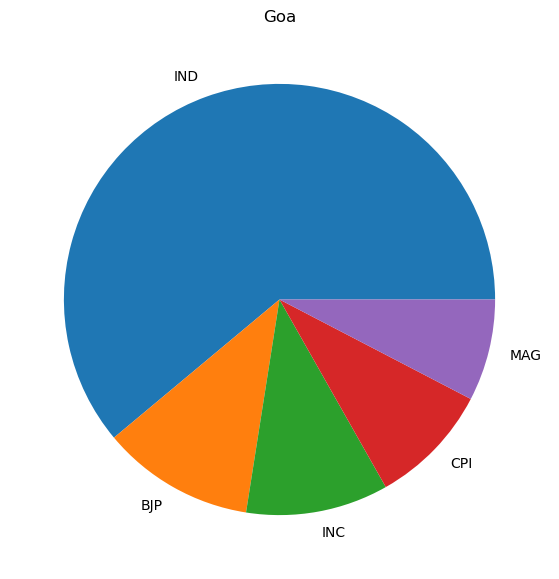

In [166]:
total_candidate('Goa')

## 2.Next part is for Vidhan Sabha Visualization

In [2]:
df=pd.read_csv(r'indian-state-level-election.csv')

In [3]:
df.head()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327294 entries, 0 to 327293
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   st_name     327294 non-null  object 
 1   year        327294 non-null  float64
 2   ac_no       327294 non-null  int64  
 3   ac_name     311211 non-null  object 
 4   ac_type     327294 non-null  object 
 5   cand_name   327294 non-null  object 
 6   cand_sex    321992 non-null  object 
 7   partyname   327294 non-null  object 
 8   partyabbre  324588 non-null  object 
 9   totvotpoll  327287 non-null  float64
 10  electors    327294 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 27.5+ MB


In [5]:
df.isnull().sum()

st_name           0
year              0
ac_no             0
ac_name       16083
ac_type           0
cand_name         0
cand_sex       5302
partyname         0
partyabbre     2706
totvotpoll        7
electors          0
dtype: int64

In [6]:
df.st_name.unique()

array(['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
       'Chhattisgarh', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'National Capital Territory Of Delhi', 'Odisha',
       'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [7]:
df[df['st_name']=='Gujarat']['cand_sex'].value_counts()

M    11120
F      484
Name: cand_sex, dtype: int64

In [8]:
df['cand_sex']=df['cand_sex'].fillna('M')

In [9]:
df['cand_sex'].isnull().sum()

0

In [10]:
df.isnull().sum()

st_name           0
year              0
ac_no             0
ac_name       16083
ac_type           0
cand_name         0
cand_sex          0
partyname         0
partyabbre     2706
totvotpoll        7
electors          0
dtype: int64

In [11]:
ls=['totvotpoll','electors']
df[ls]

,totvotpoll,electors
0,813.0,83247
1,1743.0,83247
2,4427.0,83247
3,19805.0,83247
4,34251.0,83247
...,...,...
327289,2471.0,189320
327290,3074.0,189320
327291,4961.0,189320
327292,73414.0,189320


In [12]:
df.totvotpoll.mean().round()

9300.0

In [13]:
df['totvotpoll']=df['totvotpoll'].fillna(df.totvotpoll.mean().round())

In [14]:
df.totvotpoll.isnull().sum()

0

In [15]:
df.head(10)

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247
5,Andhra Pradesh,1978.0,2,Sompeta,GEN,Ganni Padmanabharao,M,Indian National Congress,INC,2694.0,91272
6,Andhra Pradesh,1978.0,2,Sompeta,GEN,Tulasidas Majji,M,Indian National Congress (I),INC(I),28251.0,91272
7,Andhra Pradesh,1978.0,2,Sompeta,GEN,Gouthu Latchanna,M,Janata Party,JNP,42251.0,91272
8,Andhra Pradesh,1978.0,3,Tekkali,GEN,Hussana Begam,F,Indian National Congress (I),INC(I),7998.0,90959
9,Andhra Pradesh,1978.0,3,Tekkali,GEN,Satharu Lakanadham Naidu,M,Indian National Congress,INC,22502.0,90959


In [16]:
df[df['st_name']=='Andhra Pradesh']['year'].unique()

array([1978., 1983., 1985., 1989., 1994., 1999., 2004., 2009., 2014.])

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

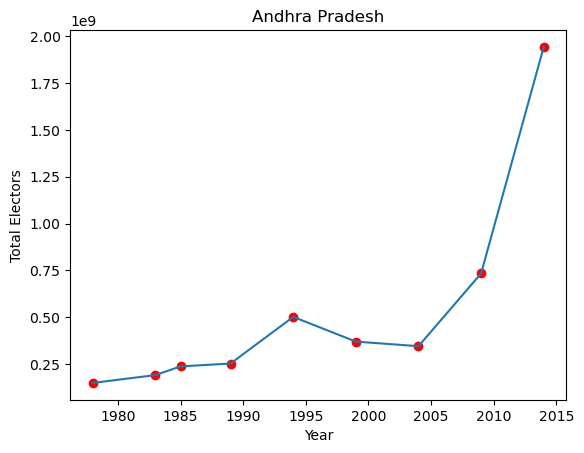

In [18]:
x=df[df['st_name']=='Andhra Pradesh']['year'].unique()
y=df[df['st_name']=='Andhra Pradesh'].groupby('year')['electors'].sum()
plt.scatter(x,y,c='red')
plt.plot(x,y)
plt.title('Andhra Pradesh')
plt.xlabel("Year")
plt.ylabel("Total Electors")
plt.show()

In [19]:
def total_electors(state):
    x=df[df['st_name']==state]['year'].unique()
    y=df[df['st_name']==state].groupby('year')['electors'].sum()
    plt.scatter(x,y,c='red')
    plt.plot(x,y)
    plt.title(state)
    plt.xlabel("Year")
    plt.ylabel("Total Electors")
    plt.show()

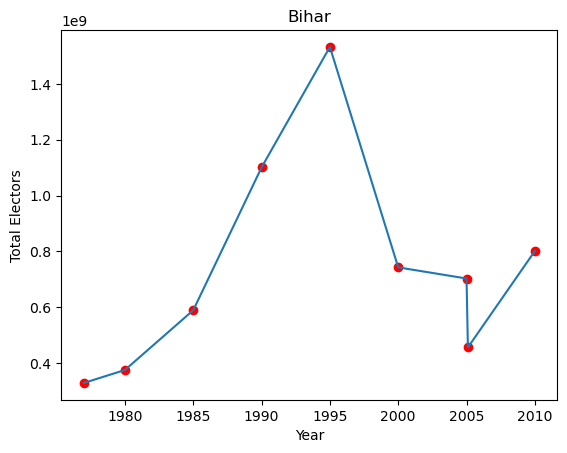

In [20]:
total_electors('Bihar')

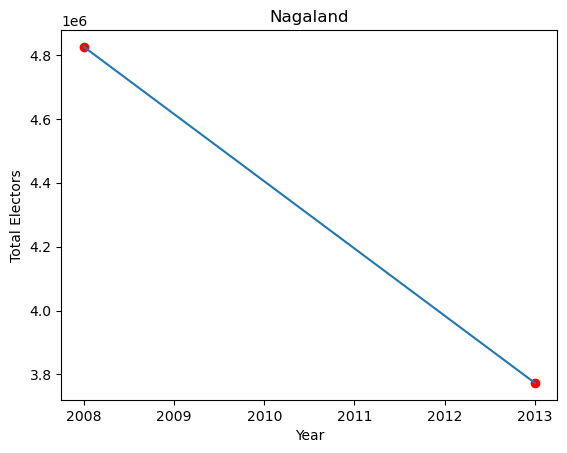

In [21]:
total_electors('Nagaland')

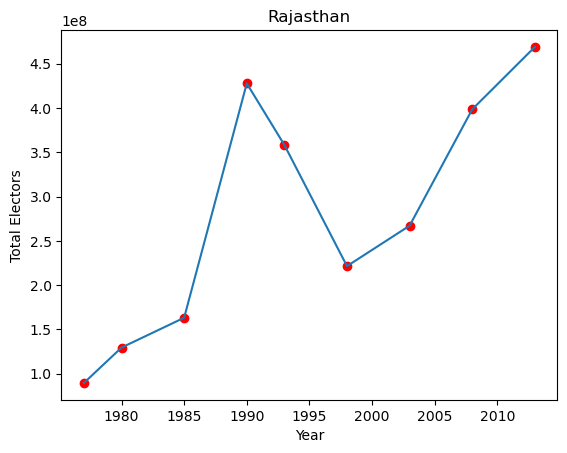

In [22]:
total_electors('Rajasthan')

In [23]:
df.tail(10)

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
327284,West Bengal,2011.0,293,Nalhati,GEN,Bikash Mondal,M,BSP,BSP,2717.0,176438
327285,West Bengal,2011.0,293,Nalhati,GEN,Anil Singha,M,BJP,BJP,10656.0,176438
327286,West Bengal,2011.0,293,Nalhati,GEN,Dipak Chatterjee,M,AIFB,AIFB,60887.0,176438
327287,West Bengal,2011.0,293,Nalhati,GEN,Abhijit Mukherjee,M,INC,INC,76047.0,176438
327288,West Bengal,2011.0,294,Murarai,GEN,Mir Mukid(Hazi Rekib),M,JP,JP,1228.0,189320
327289,West Bengal,2011.0,294,Murarai,GEN,Ajrail Md,M,IND,IND,2471.0,189320
327290,West Bengal,2011.0,294,Murarai,GEN,Shiblal Sardar,M,BSP,BSP,3074.0,189320
327291,West Bengal,2011.0,294,Murarai,GEN,Sudhiranjan Das Goswami,M,BJP,BJP,4961.0,189320
327292,West Bengal,2011.0,294,Murarai,GEN,Elahi Kamre Dr,M,CPM,CPM,73414.0,189320
327293,West Bengal,2011.0,294,Murarai,GEN,Nure Alam Chowdhury,M,AITC,AITC,77817.0,189320


In [24]:
df.ac_type.unique()

array(['GEN', 'ST', 'SC', 'BL', 'SANGH'], dtype=object)

In [25]:
def seat_type(s1,s2,s3,s4,s5):
    v1=df[df['st_name']==s1]['ac_type'].value_counts()
    v2=df[df['st_name']==s2]['ac_type'].value_counts()
    v3=df[df['st_name']==s3]['ac_type'].value_counts()
    v4=df[df['st_name']==s4]['ac_type'].value_counts()
    v5=df[df['st_name']==s5]['ac_type'].value_counts()
    de=pd.DataFrame([v1,v2,v3,v4,v5])
    de.index=[s1,s2,s3,s4,s5]
    de.plot(kind='bar',stacked=True,figsize=(10,5))

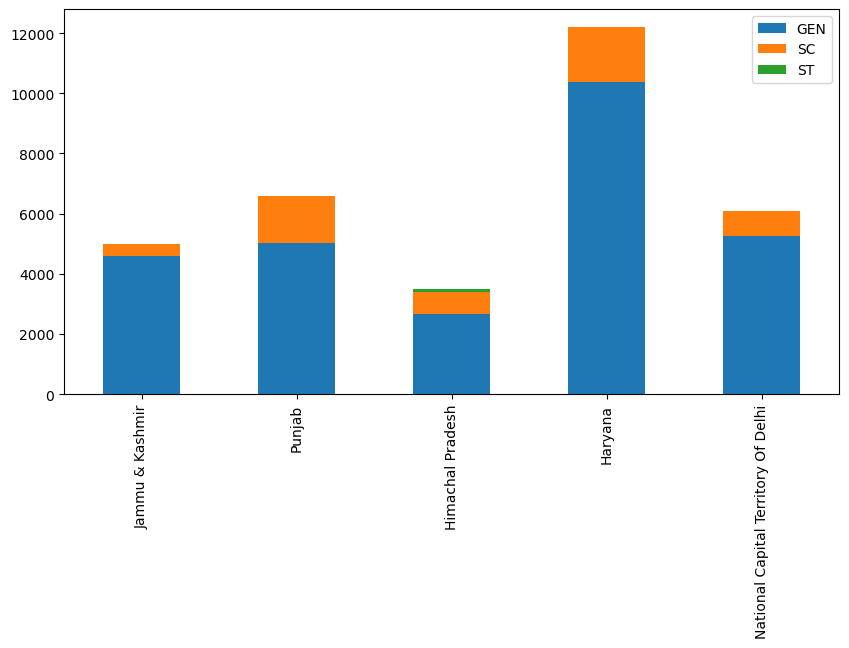

In [26]:
seat_type('Jammu & Kashmir','Punjab','Himachal Pradesh','Haryana','National Capital Territory Of Delhi')

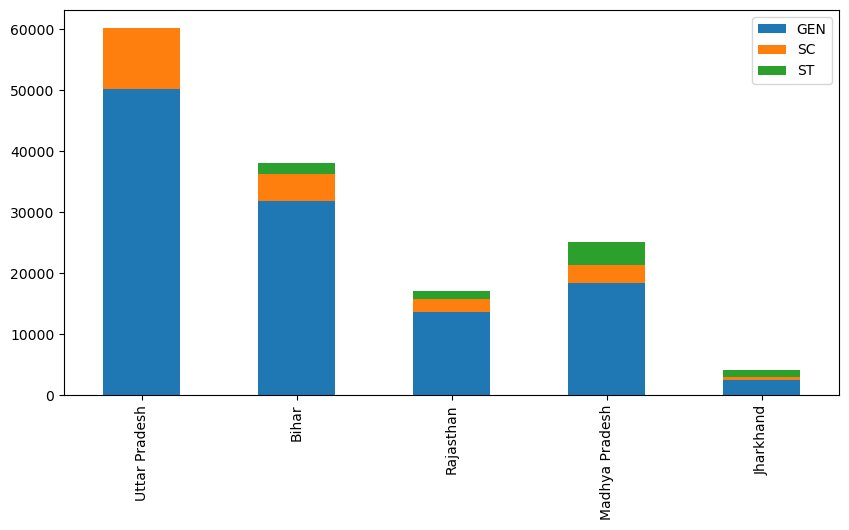

In [27]:
seat_type('Uttar Pradesh','Bihar','Rajasthan','Madhya Pradesh','Jharkhand')

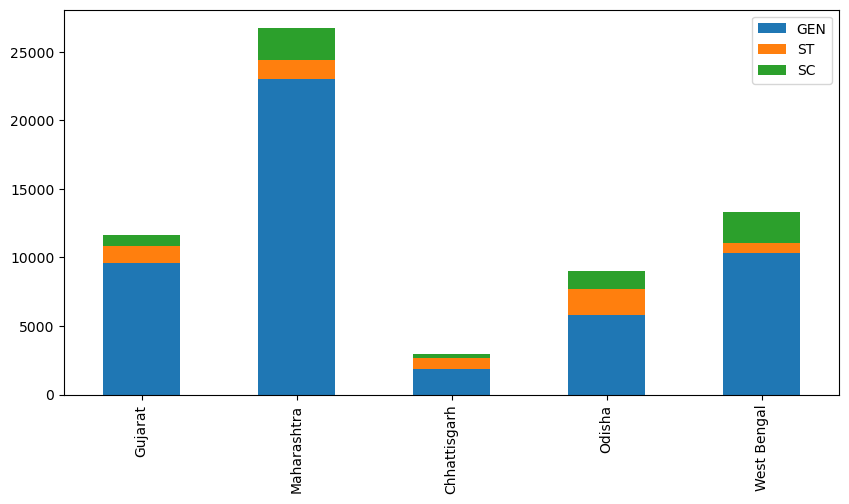

In [28]:
seat_type('Gujarat','Maharashtra','Chhattisgarh','Odisha','West Bengal')

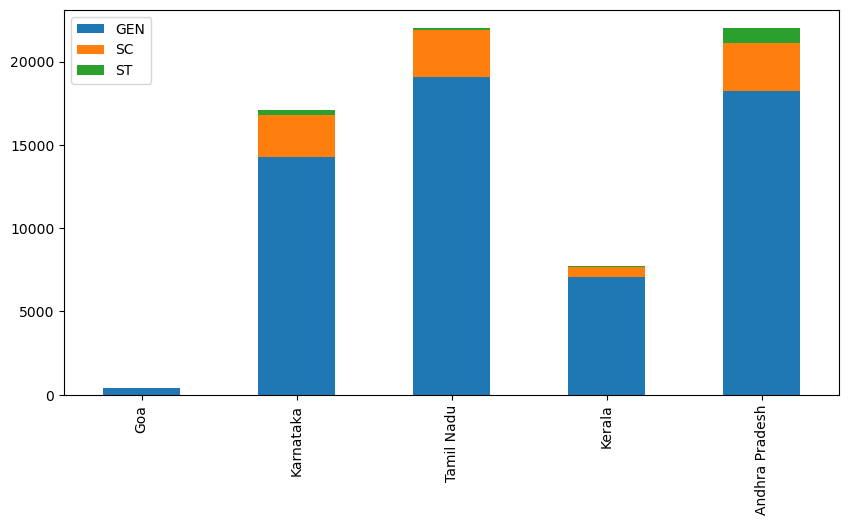

In [29]:
seat_type('Goa','Karnataka','Tamil Nadu','Kerala','Andhra Pradesh')

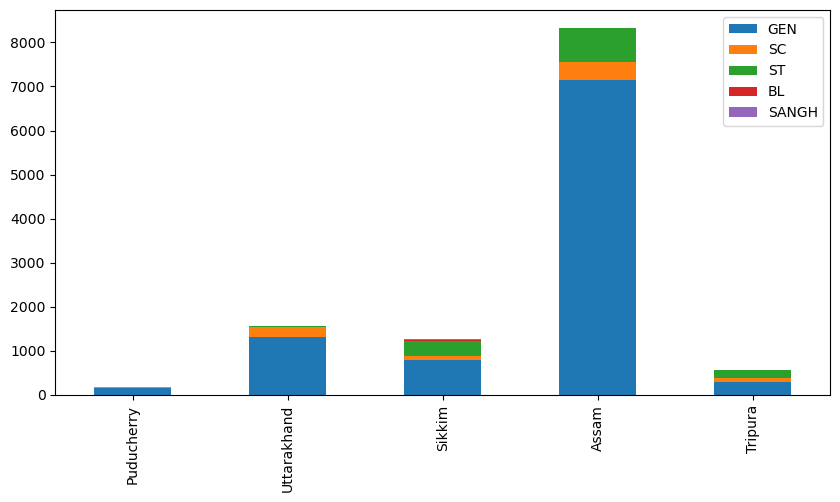

In [30]:
seat_type('Puducherry','Uttarakhand','Sikkim','Assam','Tripura')

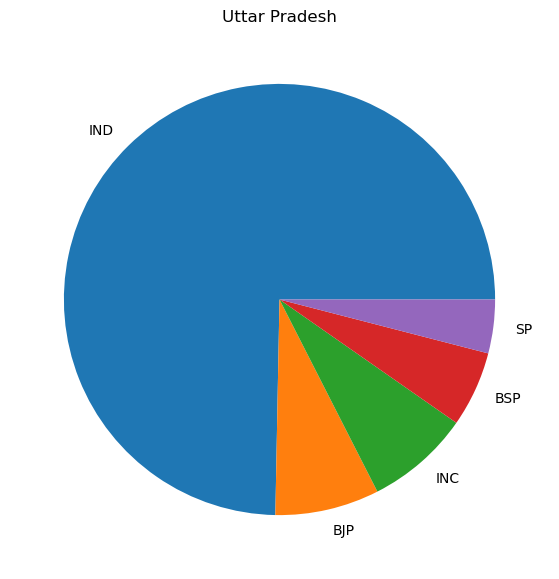

In [31]:
party=df[df['st_name']=='Uttar Pradesh']['partyabbre'].value_counts().head().keys()
de=df[df['st_name']=='Uttar Pradesh']['partyabbre'].value_counts().head()
fig = plt.figure(figsize=(10, 7))
plt.pie(de, labels=party)
plt.title('Uttar Pradesh')
plt.show()

In [32]:
def state_wise(state):
    party=df[df['st_name']==state]['partyabbre'].value_counts().head().keys()
    Data=df[df['st_name']==state]['partyabbre'].value_counts().head()
    fig = plt.figure(figsize=(10, 7))
    plt.pie(Data, labels=party)
    plt.title(state)
    plt.show()

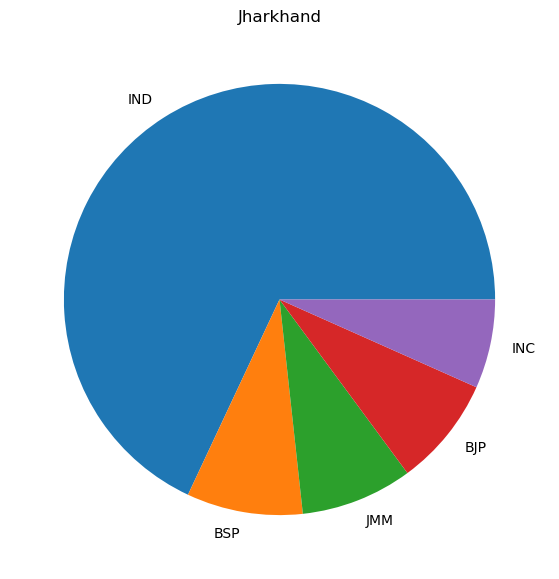

In [33]:
state_wise('Jharkhand')

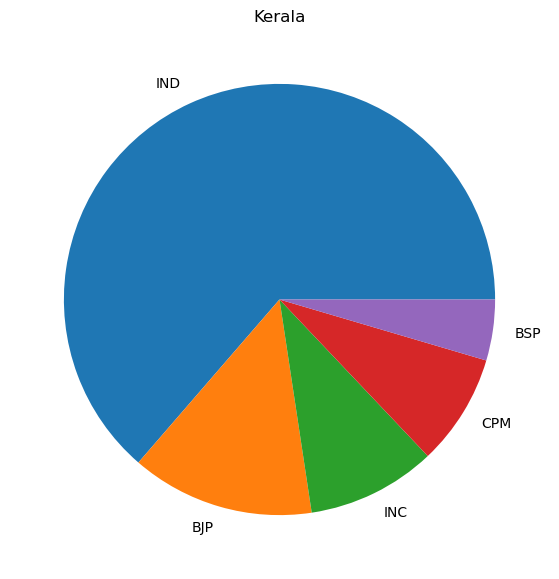

In [34]:
state_wise('Kerala')

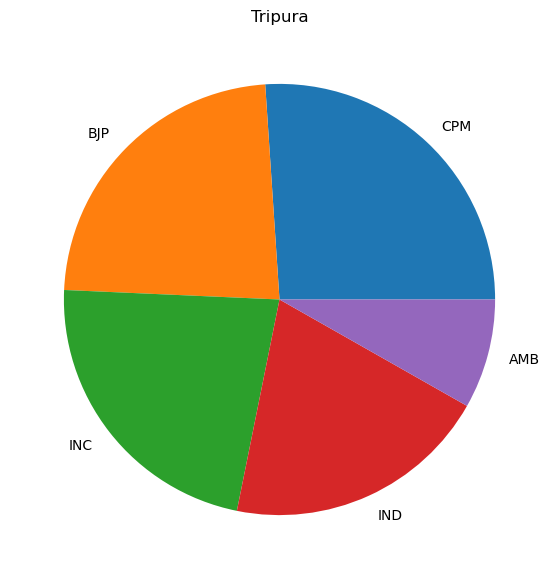

In [35]:
state_wise('Tripura')

In [36]:
df.head()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247


In [37]:
def total_voters(state):
    x=df[df['st_name']==state]['year'].unique()
    y=df[df['st_name']==state].groupby('year')['totvotpoll'].sum()
    plt.scatter(x,y,c='maroon')
    plt.plot(x,y)
    plt.title(state)
    plt.xlabel("Year")
    plt.ylabel("Total Voters")
    plt.show()

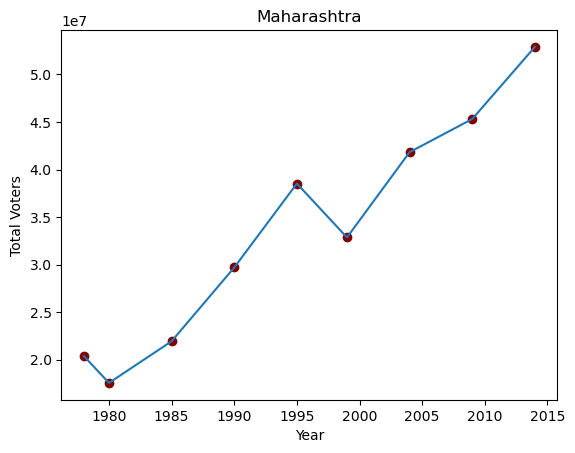

In [38]:
total_voters('Maharashtra')

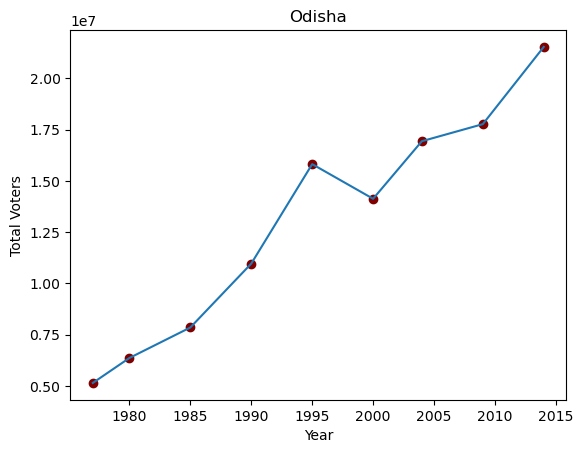

In [39]:
total_voters('Odisha')

In [40]:
df[df['st_name']=='Uttar Pradesh'].groupby('ac_name')['totvotpoll'].sum()[161:180]

ac_name
Chiraigaon     1007188.0
Chitrakoot      182425.0
Chunar         1262563.0
Colonelganj     972294.0
Dadraul        1094456.0
Dadri          1339404.0
Dalmau          971042.0
Dariyabad      1098025.0
Dataganj       1040460.0
Dayalbagh       918976.0
Debai          1036555.0
Dehra Dun       557100.0
Deoband        1186363.0
Deoprayag       405537.0
Deoria         1116392.0
Derapur         954486.0
Dhampur        1204546.0
Dhanapur        904566.0
Dhanaura        195722.0
Name: totvotpoll, dtype: float64

In [41]:
df[df['st_name']=='Uttar Pradesh']['ac_name'].sort_values().unique()[161:180]

array(['Chiraigaon', 'Chitrakoot', 'Chunar', 'Colonelganj', 'Dadraul',
       'Dadri', 'Dalmau', 'Dariyabad', 'Dataganj', 'Dayalbagh', 'Debai',
       'Dehra Dun', 'Deoband', 'Deoprayag', 'Deoria', 'Derapur',
       'Dhampur', 'Dhanapur', 'Dhanaura '], dtype=object)

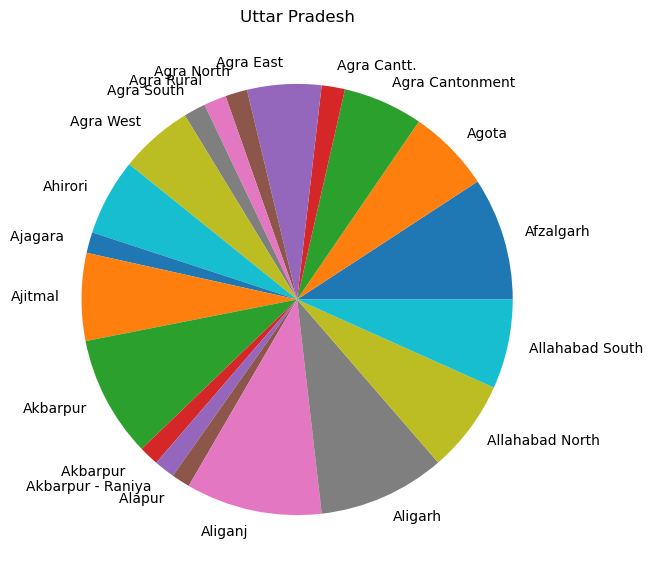

In [42]:
ac=df[df['st_name']=='Uttar Pradesh']['ac_name'].sort_values().unique()[:20]
votes=df[df['st_name']=='Uttar Pradesh'].groupby('ac_name')['totvotpoll'].sum()[:20]
fig = plt.figure(figsize=(10, 7))
plt.pie(votes, labels=ac)
plt.title('Uttar Pradesh')
plt.show()

In [43]:
def seat_wise(state,i,j):
    ac=df[df['st_name']==state]['ac_name'].sort_values().unique()[i:j]
    votes=df[df['st_name']==state].groupby('ac_name')['totvotpoll'].sum()[i:j]
    fig = plt.figure(figsize=(10, 7))
    plt.pie(votes, labels=ac)
    plt.title(state)
    plt.show()

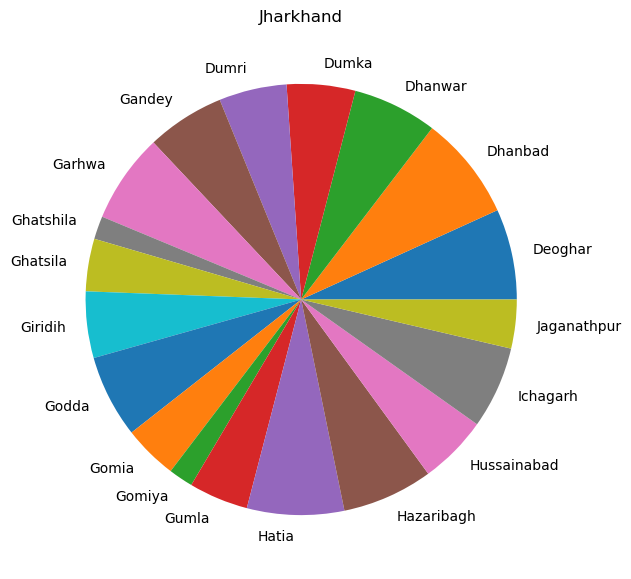

In [44]:
seat_wise('Jharkhand',21,40)

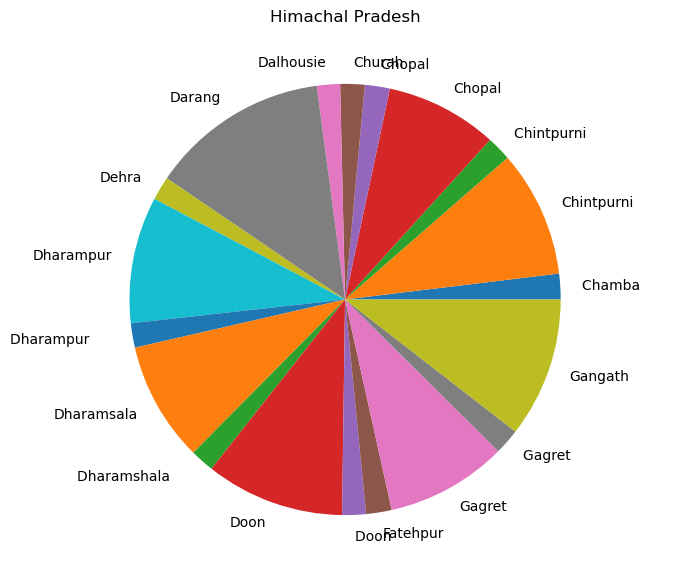

In [45]:
seat_wise('Himachal Pradesh',21,40)

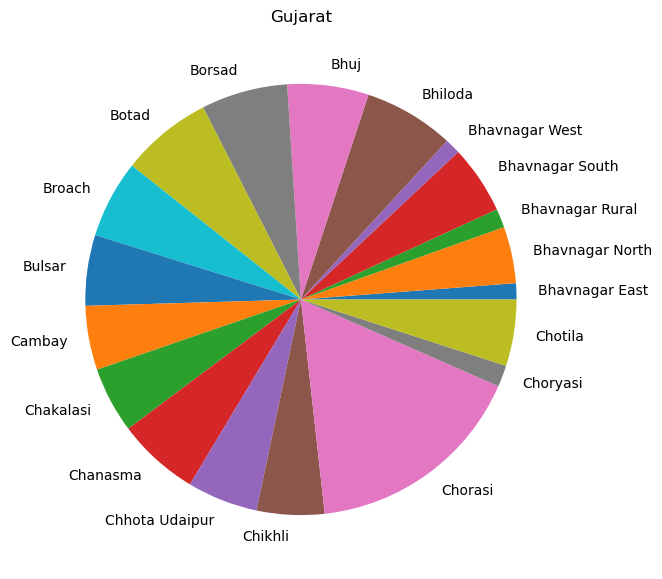

In [46]:
seat_wise('Gujarat',21,40)

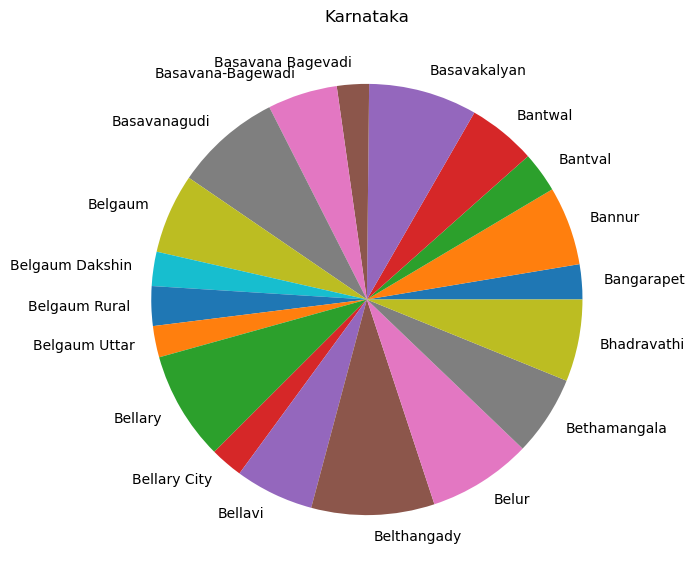

In [47]:
seat_wise('Karnataka',21,40)

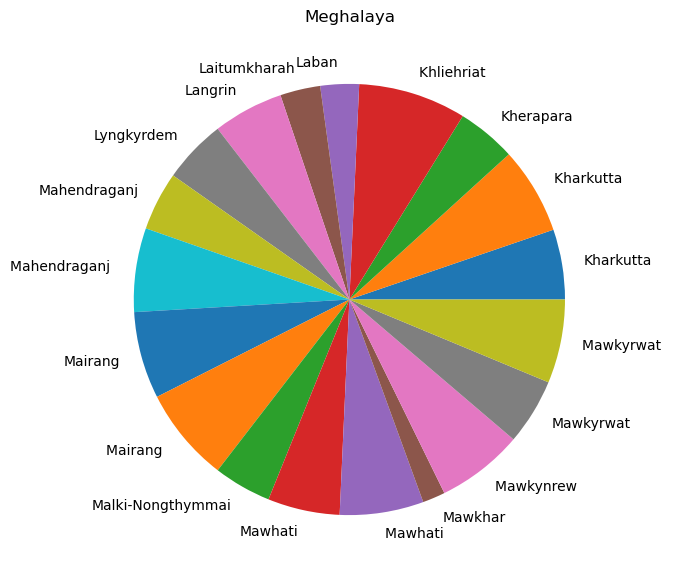

In [48]:
seat_wise('Meghalaya',21,40)

In [49]:
df.head()

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247


## Model Selection

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [216]:
# Create the 'winner' column for national-level elections
data['winner'] = data.groupby(['st_name', 'year', 'pc_no'])['totvotpoll'].transform(lambda x: x == x.max())

# Fill NaN values with 0 (no winner)
data['winner'] = data['winner'].fillna(0)

# Convert the 'winner' column to integer (1 for winner, 0 for non-winner)
data['winner'] = data['winner'].astype(int)


In [217]:
# Drop columns that are not required for prediction
national_data = data.drop(['cand_name', 'st_name', 'pc_name', 'partyname'], axis=1)


In [218]:
# Use one-hot encoding to convert categorical columns into numerical format
national_data = pd.get_dummies(national_data, columns=['cand_sex', 'partyabbre', 'pc_type'], drop_first=True)


In [219]:
# The 'winner' column is the target, while all other columns are the features
X_national = national_data.drop(['winner'], axis=1)
y_national = national_data['winner']


In [220]:
# Split the data (80% training, 20% testing)
X_train_national, X_test_national, y_train_national, y_test_national = train_test_split(X_national, y_national, test_size=0.2, random_state=42)


In [19]:
# Dictionary of models to apply
models_national = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}


In [20]:
# Function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")
    print(classification_report(y_test, y_pred))


In [223]:


# Loop through each model and evaluate
for model_name, model in models_national.items():
    print(f"Model: {model_name}")
    evaluate_model(model, X_train_national, y_train_national, X_test_national, y_test_national)
    print("=" * 50)  # Separator for readability


Model: Random Forest
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     13448
           1       0.77      0.75      0.76      1169

    accuracy                           0.96     14617
   macro avg       0.88      0.87      0.87     14617
weighted avg       0.96      0.96      0.96     14617

Model: Logistic Regression
Accuracy: 0.96
              precision    recall  f1-score   support

           0       0.97      0.98      0.98     13448
           1       0.74      0.68      0.71      1169

    accuracy                           0.96     14617
   macro avg       0.86      0.83      0.84     14617
weighted avg       0.95      0.96      0.95     14617

Model: Decision Tree
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     13448
           1       0.69      0.70      0.70      1169

    accuracy                           0.95     14617
   macro avg  

In [113]:
# Create a DataFrame to store model performance metrics
results_national = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score'])

# Evaluate each model and store the results
for model_name, model in models_national.items():
    model.fit(X_train_national, y_train_national)
    y_pred_national = model.predict(X_test_national)
    accuracy = accuracy_score(y_test_national, y_pred_national)
    f1 = classification_report(y_test_national, y_pred_national, output_dict=True)['1']['f1-score']
    results_national = results_national.append({'Model': model_name, 'Accuracy': accuracy, 'F1 Score': f1}, ignore_index=True)


C:\Users\Soham_Arote_9623\AppData\Local\Temp\ipykernel_15064\3881217128.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_national = results_national.append({'Model': model_name, 'Accuracy': accuracy, 'F1 Score': f1}, ignore_index=True)
C:\Users\Soham_Arote_9623\AppData\Local\Temp\ipykernel_15064\3881217128.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_national = results_national.append({'Model': model_name, 'Accuracy': accuracy, 'F1 Score': f1}, ignore_index=True)
C:\Users\Soham_Arote_9623\AppData\Local\Temp\ipykernel_15064\3881217128.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_national = results_national.append({'Model': model_name, 'Accuracy': accuracy, 'F1 Score': f1}, ignore_i

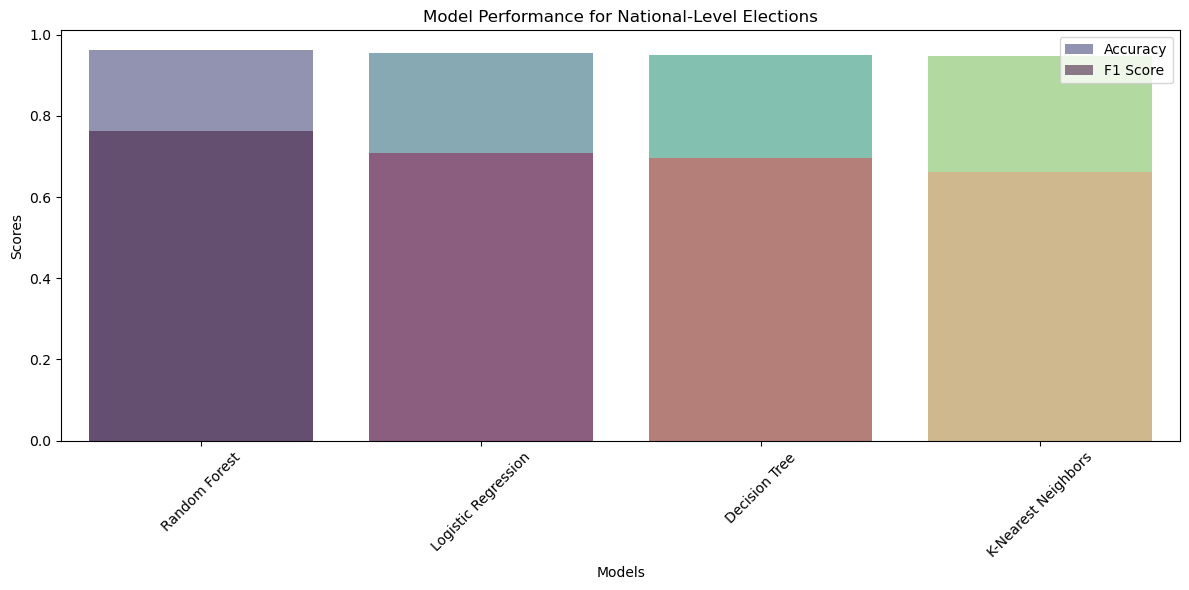

In [114]:
# Plotting the accuracy and F1 Score of each model
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_national, palette='viridis', alpha=0.6, label='Accuracy')
sns.barplot(x='Model', y='F1 Score', data=results_national, palette='rocket', alpha=0.6, label='F1 Score')
plt.title('Model Performance for National-Level Elections')
plt.ylabel('Scores')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
# Create the 'winner' column for state-level elections
df['winner'] = df.groupby(['st_name', 'year', 'ac_no'])['totvotpoll'].transform(lambda x: x == x.max())

# Fill NaN values with 0 (no winner)
df['winner'] = df['winner'].fillna(0)

# Convert the 'winner' column to integer (1 for winner, 0 for non-winner)
df['winner'] = df['winner'].astype(int)


In [22]:
# Drop columns that are not required for prediction
state_data = df.drop(['cand_name', 'st_name', 'ac_name', 'partyname'], axis=1)


In [23]:
# Use one-hot encoding to convert categorical columns into numerical format
state_data = pd.get_dummies(state_data, columns=['cand_sex', 'partyabbre', 'ac_type'], drop_first=True)


In [24]:
# The 'winner' column is the target, while all other columns are the features
X_state = state_data.drop(['winner'], axis=1)
y_state = state_data['winner']


In [25]:
# Split the data (80% training, 20% testing)
X_train_state, X_test_state, y_train_state, y_test_state = train_test_split(X_state, y_state, test_size=0.2, random_state=42)
    

In [26]:
# Loop through each model and evaluate for the state-level dataset
for model_name, model in models_national.items():  # Reusing the same models
    print(f"Model: {model_name}")
    evaluate_model(model, X_train_state, y_train_state, X_test_state, y_test_state)
    print("=" * 50)  # Separator for readability


Model: Random Forest
Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     58616
           1       0.76      0.70      0.73      6843

    accuracy                           0.95     65459
   macro avg       0.86      0.84      0.85     65459
weighted avg       0.94      0.95      0.94     65459

Model: Logistic Regression
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     58616
           1       0.71      0.59      0.64      6843

    accuracy                           0.93     65459
   macro avg       0.83      0.78      0.80     65459
weighted avg       0.93      0.93      0.93     65459

Model: Decision Tree
Accuracy: 0.93
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     58616
           1       0.66      0.68      0.67      6843

    accuracy                           0.93     65459
   macro avg  

In [27]:
# Create a DataFrame to store model performance metrics for state-level
results_state = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score'])

# Evaluate each model and store the results for state-level
for model_name, model in models_national.items():
    model.fit(X_train_state, y_train_state)
    y_pred_state = model.predict(X_test_state)
    accuracy = accuracy_score(y_test_state, y_pred_state)
    f1 = classification_report(y_test_state, y_pred_state, output_dict=True)['1']['f1-score']
    results_state = results_state.append({'Model': model_name, 'Accuracy': accuracy, 'F1 Score': f1}, ignore_index=True)


C:\Users\Soham_Arote_9623\AppData\Local\Temp\ipykernel_13996\2588295452.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_state = results_state.append({'Model': model_name, 'Accuracy': accuracy, 'F1 Score': f1}, ignore_index=True)
C:\Users\Soham_Arote_9623\AppData\Local\Temp\ipykernel_13996\2588295452.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_state = results_state.append({'Model': model_name, 'Accuracy': accuracy, 'F1 Score': f1}, ignore_index=True)
C:\Users\Soham_Arote_9623\AppData\Local\Temp\ipykernel_13996\2588295452.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_state = results_state.append({'Model': model_name, 'Accuracy': accuracy, 'F1 Score': f1}, ignore_index=True)
C:\User

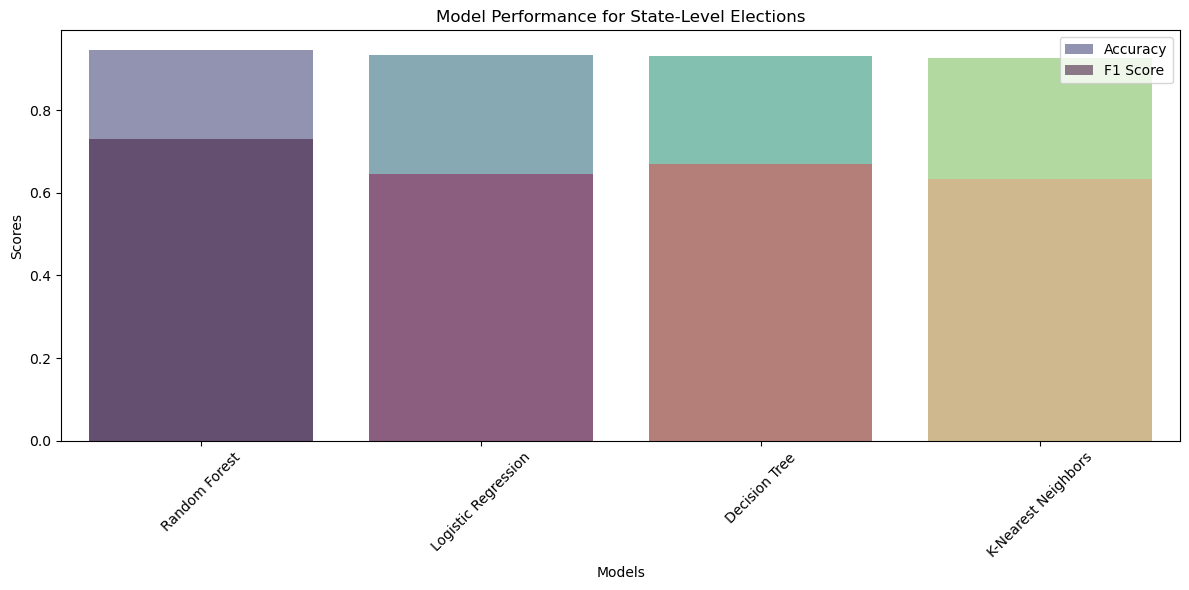

In [28]:
# Plotting the accuracy and F1 Score of each model for state-level elections
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Accuracy', data=results_state, palette='viridis', alpha=0.6, label='Accuracy')
sns.barplot(x='Model', y='F1 Score', data=results_state, palette='rocket', alpha=0.6, label='F1 Score')
plt.title('Model Performance for State-Level Elections')
plt.ylabel('Scores')
plt.xlabel('Models')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


## Model Training

### Prediction using Random Forest for both

#### This is for natonal level

## This is for state level Prediction

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [115]:
# Make predictions for the national-level dataset
best_model_national = RandomForestClassifier(n_estimators=100, random_state=42)  # Choose your best model
best_model_national.fit(X_train_national, y_train_national)
national_predictions = best_model_national.predict(X_national)
data['predicted_winner'] = national_predictions


In [139]:
# Add predicted winner to the dataset
data['predicted_winner'] = national_predictions


In [140]:
# Calculate the average winning probability by party for national-level elections
data['win_probability'] = data['totvotpoll'] / data['electors']
national_party_probabilities = data.groupby('partyname')['win_probability'].mean().reset_index()
national_party_probabilities = national_party_probabilities.sort_values(by='win_probability', ascending=False)


In [137]:
# Calculate the average winning probability by party for national-level elections
data['win_probability'] = data['totvotpoll'] / data['electors']
national_party_probabilities = data.groupby('partyname')['win_probability'].mean().reset_index()
national_party_probabilities = national_party_probabilities.sort_values(by='win_probability', ascending=False)

# Filter for the top 5 parties
top_5_parties = national_party_probabilities.head(5)


In [142]:
# Get the top 10 winning parties for 2024
top_10_parties = national_party_probabilities.head(10)

# Display the top 10 winning parties
print("Top 10 winning parties for 2024:")
print(top_10_parties[['partyname', 'win_probability']])


Top 10 winning parties for 2024:
                             partyname  win_probability
903             Nagaland Peoples Front         0.629577
1188                               SDF         0.492817
1276           Sikkim Democratic Front         0.481897
1283             Sikkimsagram Parishad         0.475592
724                     Keral Congress         0.432672
726                Kerala Congress (J)         0.429387
499   Gorkha National Liberation Front         0.409812
729                 Kerala Congress(M)         0.392798
727                Kerala Congress (M)         0.371044
642         Jammu & Kashmir Conference         0.366538


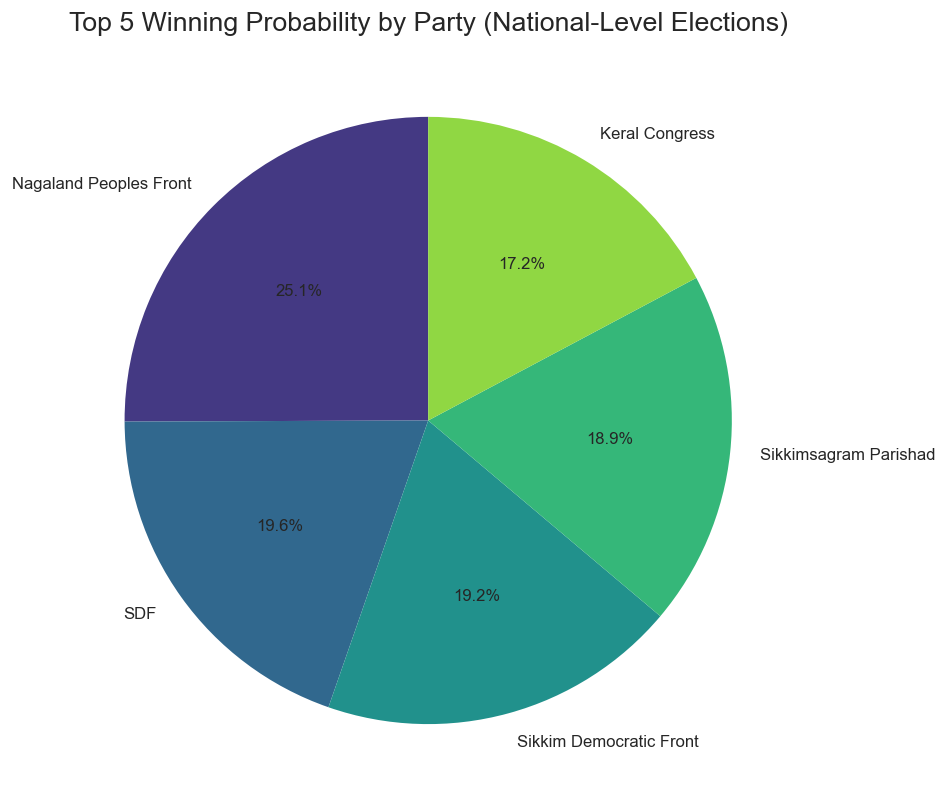

In [138]:
# Plotting winning probabilities for the top 5 parties in national-level elections as a pie chart
plt.figure(figsize=(8, 8), dpi=120)  # Set figure size and DPI

# Plotting the pie chart
plt.pie(top_5_parties['win_probability'], 
        labels=top_5_parties['partyname'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette('viridis', len(top_5_parties)),
        wedgeprops={'edgecolor': 'none'})  # Removed edge color for smooth wedges

plt.title('Top 5 Winning Probability by Party (National-Level Elections)', fontsize=16)
plt.tight_layout()
plt.show()


In [146]:
df.head(5)

,st_name,year,ac_no,ac_name,ac_type,cand_name,cand_sex,partyname,partyabbre,totvotpoll,electors,winner
0,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Manabala Ramarao,M,Independent,IND,813.0,83247,0
1,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Appadu Sahu,M,Independent,IND,1743.0,83247,0
2,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Uppada Rangababu,M,Indian National Congress,INC,4427.0,83247,0
3,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Kalla Balarama Swamy,M,Indian National Congress (I),INC(I),19805.0,83247,0
4,Andhra Pradesh,1978.0,1,Ichapuram,GEN,Bendalam Venkatesam Sarma,M,Janata Party,JNP,34251.0,83247,1


In [29]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Classifier
rf_model_state = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_state.fit(X_train_state, y_train_state)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions for the state-level dataset
df['predicted_winner'] = rf_model_state.predict(X_state)

# Calculate the winning probability
df['win_probability'] = df['totvotpoll'] / df['electors']

# Get the predicted winning party based on the predicted winners
df['predicted_party'] = df.apply(lambda row: row['partyname'] if row['predicted_winner'] == 1 else None, axis=1)

In [ ]:
# Get the top winning party for each state based on the predicted winners
top_party_per_state = df[df['predicted_winner'] == 1].groupby(['st_name', 'predicted_party']).agg({'win_probability': 'mean'}).reset_index()

# Get the top party per state
top_party_per_state = top_party_per_state.loc[top_party_per_state.groupby('st_name')['win_probability'].idxmax()]

# Select relevant columns
top_party_per_state = top_party_per_state[['st_name', 'predicted_party', 'win_probability']]

In [31]:
# Display the top winning party for each state
print("Top Winning Party for Each State:")
print(top_party_per_state)


Top Winning Party for Each State:
                                 st_name  \
30                        Andhra Pradesh   
32                     Arunachal Pradesh   
58                                 Assam   
92                                 Bihar   
133                         Chhattisgarh   
140                                  Goa   
144                              Gujarat   
189                              Haryana   
198                     Himachal Pradesh   
229                      Jammu & Kashmir   
245                            Jharkhand   
290                            Karnataka   
331                               Kerala   
348                       Madhya Pradesh   
419                          Maharashtra   
444                              Manipur   
450                            Meghalaya   
460                              Mizoram   
479                             Nagaland   
490  National Capital Territory Of Delhi   
499                               Odisha  

In [46]:
# Make predictions for the state-level dataset
df['predicted_winner'] = rf_model_state.predict(X_state)

# Calculate the winning probability
df['win_probability'] = df['totvotpoll'] / df['electors']

# Get the predicted winning party based on the predicted winners
df['predicted_party'] = df.apply(lambda row: row['partyname'] if row['predicted_winner'] == 1 else None, axis=1)

# Get the top winning party for each state based on the predicted winners
top_party_per_state = df[df['predicted_winner'] == 1].groupby(['st_name', 'predicted_party']).agg({'win_probability': 'mean'}).reset_index()

# Get the top party per state
top_party_per_state = top_party_per_state.loc[top_party_per_state.groupby('st_name')['win_probability'].idxmax()]

# Select relevant columns (removing 'win_probability')
top_party_per_state = top_party_per_state[['st_name', 'predicted_party']]

# Display the top winning party for each state
print("Top Winning Party for Each State:")
for index, row in top_party_per_state.iterrows():
    print(f"{row['st_name']} {' ' * 6} {row['predicted_party']}")


Top Winning Party for Each State:
Andhra Pradesh        Telugu Desam Party
Arunachal Pradesh        AITC
Assam        Autonomous State Demand Committee
Bihar        Champaran Vikas Party
Chhattisgarh        INC
Goa        MAG
Gujarat        BJP
Haryana        SAD
Himachal Pradesh        Communist Party Of India
Jammu & Kashmir        Jamait-I-Islami
Jharkhand        JBSP
Karnataka        SKP
Kerala        Kerala Congress (Pillai Group)
Madhya Pradesh        Akhil Bhartiya Ramrajya Parishad
Maharashtra        Nag Vidarbha Andolan Samiti
Manipur        MPP
Meghalaya        BJP
Mizoram        INC
Nagaland        NPF
National Capital Territory Of Delhi        Janata Dal (Not To Be Used In General Elections, 1999)
Odisha        All India Trinamool Congress
Puducherry        INC
Punjab        INC
Rajasthan        nuzp
Sikkim        Sikkim Democratic Front
Tamil Nadu        ADMK
Tripura        RSP
Uttar Pradesh        Akhil Bhartiya Lok Tantrik Congress
Uttarakhand        INC
West Bengal     